In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [119]:
import scipy.stats as stats

In [120]:
from pandas.plotting import scatter_matrix

In [121]:
import glob
files=[]

for filename in glob.glob("C:/Users/nikhi/OneDrive/Documents/MSIM SEM 2/Applied Data Science/Project Netflix/download/training_set/*.txt"):
    files.append(filename)

In [102]:
filenames=[]
for i in range(0,100,1):
    l=files[i].split("\\")
    filenames.append(l[-1])
print(filenames)


['mv_0000001.txt', 'mv_0000002.txt', 'mv_0000003.txt', 'mv_0000004.txt', 'mv_0000005.txt', 'mv_0000006.txt', 'mv_0000007.txt', 'mv_0000008.txt', 'mv_0000009.txt', 'mv_0000010.txt', 'mv_0000011.txt', 'mv_0000012.txt', 'mv_0000013.txt', 'mv_0000014.txt', 'mv_0000015.txt', 'mv_0000016.txt', 'mv_0000017.txt', 'mv_0000018.txt', 'mv_0000019.txt', 'mv_0000020.txt', 'mv_0000021.txt', 'mv_0000022.txt', 'mv_0000023.txt', 'mv_0000024.txt', 'mv_0000025.txt', 'mv_0000026.txt', 'mv_0000027.txt', 'mv_0000028.txt', 'mv_0000029.txt', 'mv_0000030.txt', 'mv_0000031.txt', 'mv_0000032.txt', 'mv_0000033.txt', 'mv_0000034.txt', 'mv_0000035.txt', 'mv_0000036.txt', 'mv_0000037.txt', 'mv_0000038.txt', 'mv_0000039.txt', 'mv_0000040.txt', 'mv_0000041.txt', 'mv_0000042.txt', 'mv_0000043.txt', 'mv_0000044.txt', 'mv_0000045.txt', 'mv_0000046.txt', 'mv_0000047.txt', 'mv_0000048.txt', 'mv_0000049.txt', 'mv_0000050.txt', 'mv_0000051.txt', 'mv_0000052.txt', 'mv_0000053.txt', 'mv_0000054.txt', 'mv_0000055.txt', 'mv_00000

In [138]:
all_data=pd.DataFrame([])
files=filenames
x=0
#columns=['Cust_Id', 'Rating','Date']
#dfObj = pd.DataFrame(columns=['User_ID', 'UserName', 'Action'])
for i in files:
    x=x+1
    if x>3:#if command for selection of amount of movies
        break
    df = pd.read_csv("C:/Users/nikhi/OneDrive/Documents/MSIM SEM 2/Applied Data Science/Project Netflix/download/training_set/"+i, skiprows=1, header = None)
   # df['movie_id']=
    df['movie_id']=1+files.index(i)
    all_data=all_data.append(df)

   

In [139]:
all_data=all_data.rename(columns={0:'Cust_Id', 1:'Rating',2:'Date'}) 
all_data.head(2000)
#print data, columns named for Cust_Id and Date

,Cust_Id,Rating,Date,movie_id
0,30878,4,2005-12-26,1
1,823519,3,2004-05-03,1
2,893988,3,2005-11-17,1
3,124105,4,2004-08-05,1
4,1248029,3,2004-04-22,1
...,...,...,...,...
1307,1321550,1,2003-09-10,3
1308,305344,2,2003-03-23,3
1309,2334574,1,2003-04-08,3
1310,964421,3,2003-05-16,3


In [155]:
#date_object = datetime.strptime(date_str, '%Y-%m-%d').date()
all_data['Date'] = pd.to_datetime(all_data['Date'])
#Converted string to datetime 


In [141]:
import datetime
all_data['month']=0
all_data['month']=all_data['Date'].dt.month
#all_data.head(10)
all_data.sort_values(by=['month'])
all_data.head(10)

,Cust_Id,Rating,Date,movie_id,month
0,30878,4,2005-12-26,1,12
1,823519,3,2004-05-03,1,5
2,893988,3,2005-11-17,1,11
3,124105,4,2004-08-05,1,8
4,1248029,3,2004-04-22,1,4
5,1842128,4,2004-05-09,1,5
6,2238063,3,2005-05-11,1,5
7,1503895,4,2005-05-19,1,5
8,2207774,5,2005-06-06,1,6
9,2590061,3,2004-08-12,1,8


In [142]:
all_data.sort_values(by=['Date'])

,Cust_Id,Rating,Date,movie_id,month
1210,789014,1,2003-02-11,3,2
1816,1639792,1,2003-02-12,3,2
1765,575714,3,2003-02-12,3,2
394,2439493,1,2003-02-12,3,2
60,1977959,4,2003-02-12,3,2
...,...,...,...,...,...
0,30878,4,2005-12-26,1,12
1787,1037245,3,2005-12-27,3,12
183,14756,4,2005-12-27,1,12
44,2647871,4,2005-12-30,1,12


month
1     3.726708
2     3.600000
3     3.650407
4     3.725100
5     3.694118
6     3.613027
7     3.613546
8     3.528571
9     3.756637
10    3.748815
11    3.670157
12    3.609589
Name: Rating, dtype: float64


Text(0, 0.5, 'Mean rating')

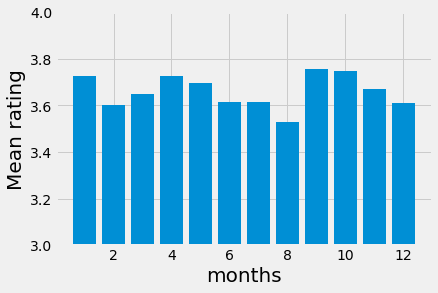

In [156]:
t=pd.DataFrame([])
t['me']=all_data.groupby('month')['Rating'].mean()
print(all_data.groupby('month')['Rating'].mean())
#print(t['me'])
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],t['me'])
plt.ylim(3,4)
plt.xlabel('months',size = 20)
plt.ylabel('Mean rating',size = 20)
#Created a new data frame and found out mean of movie ratings for each month

In [158]:
mu=all_data['Rating'].mean()#Mean of total ratings for gaussian
print(mu)

3.6580214894405336


In [159]:
sigma=np.std(t)#Standard Deviation

In [160]:
x1=min(t['me'])
print(x1)
x2=max(t['me'])
print(x2)
#Lower and Upper bounds

3.5285714285714285
3.756637168141593


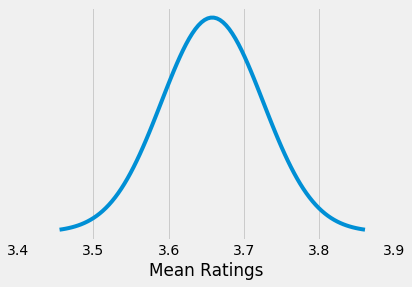

In [170]:
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
#plt.plot(t['me'],stats.norm.pdf(x, mu, sigma),'bo')for gaussian curve
plt.xlabel ("Mean Ratings")
plt.yticks([])
plt.xticks([3.4,3.5,3.6,3.7,3.8,3.9])
plt.show()


Text(0, 0.5, 'Mean Ratings')

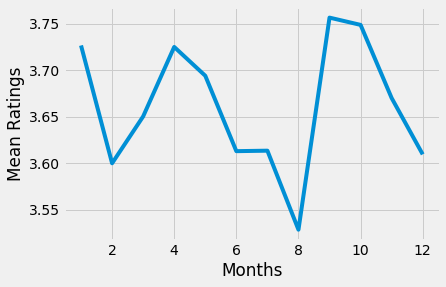

In [172]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],t['me'])
plt.xlabel ("Months")
plt.ylabel ("Mean Ratings")
#plotted mean ratings over different months